1. crea un dataframe con le colonne:
    * - id studente [incrementale]
    * - voto italiano [valori tra 1-10]
    * - voto storia [valori tra 1-10]
    * - voto geografia [valori tra 1-10]
    * - voto matematica [valori tra 1-10]
    * - voto fisica [valori tra 1-10]
    * - voto inglese [valori tra 1-10]

    Dataframe di 1000 righe

2. Trovare media, il massimo , il minimo, e la varianza della classe
3. Fare preprocessing e normalizzare i voti con min max scaler e togliere l'id studente
4. Crea una colonna con la media voto per studente: df['Media Voto'] = df[voti_columns].mean(axis=1)df['Media Voto'] = df[voti_columns].mean(axis=1)
5. Crea una colonna per le labels cioè se uno studente è promosso o no: df['promosso'] = df['Media Voto'] >= 6
6. Preprocessing della colonna bocciato
7. Provare a prendire se uno studente boccierà o no




In [220]:
import pandas as pd 
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [221]:
# 1. Creazione del DataFrame con 1000 righe e colonne specificate
n_students = 1000

# Inizializziamo il DataFrame con la colonna 'id_studente'
dataset = pd.DataFrame()
dataset["id_studente"] = pd.Series(range(1, n_students + 1))

# Creiamo i voti per ciascuna materia usando un ciclo senza list comprehension
materie = ["voti_italiano", "voti_storia", "voti_geografia", "voti_matematica", "voti_fisica", "voti_inglese"]

# Popoliamo il DataFrame con voti casuali tra 1 e 10 per ogni materia
for materia in materie:
    voti = []
    for _ in range(n_students):
        voti.append(random.randint(1, 10))
    dataset[materia] = pd.Series(voti)

print(dataset.info())

#metodo1
statistiche = dataset.agg(['mean', 'max', 'min', 'var'])

#metodo2
statistiche = dataset.describe()

#metodo3
# 2. Estraiamo i nomi delle colonne direttamente dal DataFrame, escludendo 'id_studente'
# materie = [col for col in dataset.columns if col != "id_studente"]

# materie = []

# for col in dataset.columns:
#     if col != "id_studente":
#         materie.append(col)

# # Inizializziamo un dizionario per memorizzare le statistiche
# statistiche = {"mean": {}, "max": {}, "min": {}, "var": {}}

# # Calcoliamo le statistiche per ogni colonna utilizzando cicli for
# for materia in materie:
#     colonna = dataset[materia]
#     media = colonna.mean()
#     massimo = colonna.max()
#     minimo = colonna.min()
#     varianza = colonna.var()

#     # Memorizziamo i risultati nel dizionario
#     statistiche["mean"][materia] = media
#     statistiche["max"][materia] = massimo
#     statistiche["min"][materia] = minimo
#     statistiche["var"][materia] = varianza

# # Mostriamo le statistiche calcolate
# for stat, valori in statistiche.items():
#     print(f"\nStatistiche - {stat}:")
#     for materia, valore in valori.items():
#         print(f"{materia}: {valore:.2f}")

# print(statistiche)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id_studente      1000 non-null   int64
 1   voti_italiano    1000 non-null   int64
 2   voti_storia      1000 non-null   int64
 3   voti_geografia   1000 non-null   int64
 4   voti_matematica  1000 non-null   int64
 5   voti_fisica      1000 non-null   int64
 6   voti_inglese     1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB
None


In [222]:
materie = [col for col in dataset.columns if col != "id_studente"]

# 3. Preprocessing: Normalizzazione dei voti con MinMaxScaler
normalizer = MinMaxScaler()

# Normalizziamo solo le colonne dei voti, escludendo 'id_studente'
dataset[materie] = normalizer.fit_transform(dataset[materie])

# Mostriamo le prime righe del DataFrame normalizzato
print("Dataset normalizzato (prime 5 righe):")
print(dataset.head())

# # Creiamo un grafico a istogramma per ciascuna materia
# materie1 = [col for col in dataset.columns if col.startswith("voti")]

# for materia in materie1:
#     plt.hist(dataset[materia], bins=10, alpha=0.6, label=materia)

# # Configurazione del grafico
# plt.title("Distribuzione dei Voti Originali per Materia")
# plt.xlabel("Voto (1-10)")
# plt.ylabel("Frequenza")
# plt.legend()
# plt.grid(axis='y')
# plt.show()

Dataset normalizzato (prime 5 righe):
   id_studente  voti_italiano  voti_storia  voti_geografia  voti_matematica  \
0            1       0.777778     0.888889        0.000000         0.555556   
1            2       0.000000     0.111111        1.000000         0.666667   
2            3       0.888889     0.555556        0.000000         0.666667   
3            4       0.444444     0.555556        0.888889         0.222222   
4            5       0.444444     0.000000        0.555556         0.777778   

   voti_fisica  voti_inglese  
0     0.777778      0.000000  
1     0.222222      0.888889  
2     0.666667      0.444444  
3     0.000000      0.333333  
4     0.222222      1.000000  


In [223]:
# Usiamo il metodo mean() con axis=1 per calcolare la media dei voti su tutte le materie
dataset["Media_Voto"] = dataset[materie].mean(axis=1)

# Mostriamo le prime righe del DataFrame con la nuova colonna 'Media_Voto'

print("Dataset con la colonna 'Media_Voto' (prime 5 righe):")
dataset['promosso'] = dataset['Media_Voto'] >= 0.6
print(dataset.head())

Dataset con la colonna 'Media_Voto' (prime 5 righe):
   id_studente  voti_italiano  voti_storia  voti_geografia  voti_matematica  \
0            1       0.777778     0.888889        0.000000         0.555556   
1            2       0.000000     0.111111        1.000000         0.666667   
2            3       0.888889     0.555556        0.000000         0.666667   
3            4       0.444444     0.555556        0.888889         0.222222   
4            5       0.444444     0.000000        0.555556         0.777778   

   voti_fisica  voti_inglese  Media_Voto  promosso  
0     0.777778      0.000000    0.500000     False  
1     0.222222      0.888889    0.481481     False  
2     0.666667      0.444444    0.537037     False  
3     0.000000      0.333333    0.407407     False  
4     0.222222      1.000000    0.500000     False  


In [224]:
label_encoder = LabelEncoder()
label_encoder.fit(dataset[['promosso']])
dataset['promosso'] = label_encoder.transform(dataset[['promosso']])

display(dataset.head())

c:\Users\lucar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lucar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


,id_studente,voti_italiano,voti_storia,voti_geografia,voti_matematica,voti_fisica,voti_inglese,Media_Voto,promosso
0,1,0.777778,0.888889,0.000000,0.555556,0.777778,0.000000,0.500000,0
1,2,0.000000,0.111111,1.000000,0.666667,0.222222,0.888889,0.481481,0
2,3,0.888889,0.555556,0.000000,0.666667,0.666667,0.444444,0.537037,0
3,4,0.444444,0.555556,0.888889,0.222222,0.000000,0.333333,0.407407,0
4,5,0.444444,0.000000,0.555556,0.777778,0.222222,1.000000,0.500000,0


In [225]:
X = dataset.drop(columns=["Media_Voto", "promosso", 'id_studente'])
y = dataset["promosso"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=79, test_size = 0.2)

# 2. Creazione e training del modello SVM con kernel lineare
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# 3. Previsioni sul test set
y_pred = svm.predict(X_test)

# 4. Valutazione del modello
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Mostriamo i risultati
print(f"Accuratezza del modello: {accuracy:.2f}")
print("Report di classificazione:\n", report)

Accuratezza del modello: 0.99
Report di classificazione:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       158
           1       1.00      0.95      0.98        42

    accuracy                           0.99       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.99      0.99       200



In [226]:
# Esempio di voti per un nuovo studente (voti originali, non normalizzati)
nuovo_studente = {
    "voti_italiano": 7,
    "voti_storia": 5,
    "voti_geografia": 6,
    "voti_matematica": 8,
    "voti_fisica": 6,
    "voti_inglese": 7
}

# Creiamo un DataFrame per il nuovo studente con i nomi delle colonne corretti
nuovo_studente_df = pd.DataFrame([nuovo_studente])

# Normalizziamo i voti utilizzando lo stesso scaler usato per il training
nuovo_studente_normalizzato = normalizer.transform(nuovo_studente_df)

# Facciamo la previsione utilizzando il modello addestrato
predizione = svm.predict(nuovo_studente_normalizzato)

# Mostriamo il risultato
risultato = "Promosso" if predizione[0] == 1 else "Bocciato"
print(f"Lo studente è: {risultato}")

Lo studente è: Bocciato


c:\Users\lucar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

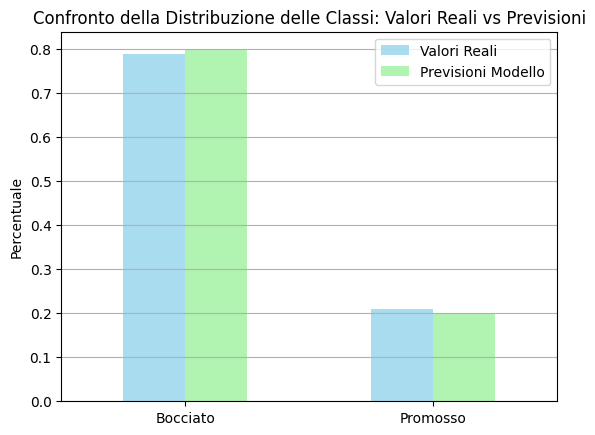

In [227]:
# Calcoliamo la distribuzione delle classi reali e delle previsioni
distribuzione_real = y_test.value_counts(normalize=True)
distribuzione_pred = pd.Series(y_pred).value_counts(normalize=True)

# Creiamo un DataFrame per visualizzare meglio le distribuzioni
confronto_distribuzione = pd.DataFrame({
    'Valori Reali': distribuzione_real,
    'Previsioni Modello': distribuzione_pred
})

# Visualizziamo il grafico a barre comparativo
plt.figure(figsize=(10, 6))
confronto_distribuzione.plot(kind='bar', color=['skyblue', 'lightgreen'], alpha=0.7)
plt.title("Confronto della Distribuzione delle Classi: Valori Reali vs Previsioni")
plt.xticks([0, 1], ['Bocciato', 'Promosso'], rotation=0)
plt.ylabel("Percentuale")
plt.grid(axis='y')
plt.show()